# 第4课：Data processing and analysis with pandas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1.Series object

In [7]:
s = pd.Series([909976,8615246,2872086, 2273305])

In [3]:
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [5]:
type(s)

pandas.core.series.Series

In [8]:
s.dtype

dtype('int64')

In [9]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [10]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

In [11]:
s.index = ["Stockholm", "London", "Rome", "Paris"]

In [12]:
s.name = "Population"

In [13]:
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [14]:
s = pd.Series([909976, 8615246, 2872086, 2773305],
             index=["Stockholm", "London", "Rome", "Paris"],name="Population")

In [15]:
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2773305
Name: Population, dtype: int64

In [16]:
s["London"]

8615246

In [17]:
s.Stockholm

909976

In [18]:
s[["Paris","Rome"]]

Paris    2773305
Rome     2872086
Name: Population, dtype: int64

In [19]:
s.median()

2822695.5

In [20]:
s.mean(),s.std()

(3792653.25, 3339348.4332810966)

In [21]:
s.min(),s.max()

(909976, 8615246)

In [22]:
s.quantile(q=0.25), s.quantile(q=1/2), s.quantile(q=.75)

(2307472.75, 909976.0, 4307876.0)

In [23]:
s.describe()

count    4.000000e+00
mean     3.792653e+06
std      3.339348e+06
min      9.099760e+05
25%      2.307473e+06
50%      2.822696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

In [24]:
pd.set_option('display.mpl_style','default')

/home/evil_rabbit/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


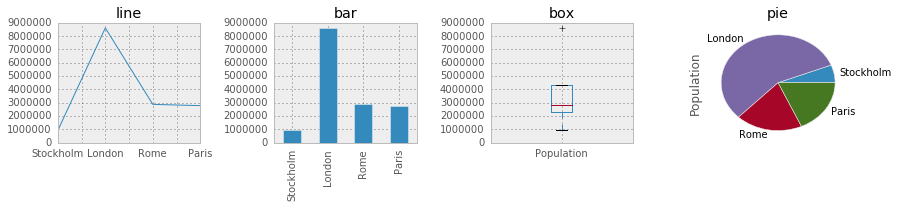

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar',  title="bar")
s.plot(ax=axes[2], kind='box',  title="box")
s.plot(ax=axes[3], kind='pie',  title="pie")

fig.tight_layout()
fig.savefig("ch12-series-plot.pdf")
fig.savefig("ch12-series-plot.png")

## 2.DataFrame object

In [28]:
df = pd.DataFrame([[909976,8615246,2872086,2273305],
                  ["Sweden","UK", "Italy", "Fance"]])

In [29]:
df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sweden,UK,Italy,Fance


In [31]:
df = pd.DataFrame([[909976,"Sweden"],
                 [8615246,"United kingdom"],
                 [2872086,"Italy"],
                  [2273305,"France"]])

In [32]:
df

,0,1
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


In [33]:
df.index = ["Stockholm", "London", "Rome", "Paris"]

In [36]:
df.columns = ["Population", "State"]

In [37]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [38]:
df = pd.DataFrame([
        [909976, "Sweden"],
        [8615246, "United Kingdom"],
        [2872086, "Italy"],
        [2273305, "France"]],
        index = ["Stockholm", "London", "Rome", "Paris"],
        columns = ["Population", "State"]
        )

In [39]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [44]:
df = pd.DataFrame({
        "Population": [909976, 8615246, 2872086, 2273305],
        "State": ["Sweden", "United Kingdom", "Italy", "France"]},
        index=["Stockholm", "London", "Rome", "Paris"])

In [45]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [46]:
df.index

Index([u'Stockholm', u'London', u'Rome', u'Paris'], dtype='object')

In [47]:
df.columns

Index([u'Population', u'State'], dtype='object')

In [48]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [49]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [50]:
type(df["Population"])

pandas.core.series.Series

In [51]:
df.Population.Stockholm

909976

In [52]:
type(df.ix)

pandas.core.indexing._IXIndexer

In [53]:
df.ix["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [54]:
type(df.ix["Stockholm"])

pandas.core.series.Series

In [55]:
df.ix[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [56]:
df.ix[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [58]:
df.ix[["Paris", "Rome"], "State"]

Paris    France
Rome      Italy
Name: State, dtype: object

In [59]:
df.ix["Paris","Population"]

2273305

In [63]:
df.ix["Paris"]

Population    2273305
State          France
Name: Paris, dtype: object

In [64]:
df.mean()

Population    3667653.25
dtype: float64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 96.0+ bytes


In [66]:
df.dtypes

Population     int64
State         object
dtype: object

In [67]:
df.head()

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [1]:
!head -n5 european_cities.csv

Rank,City,State,Population,Date of census/estimate
1,London[2], United Kingdom,"8,615,246",1 June 2014
2,Berlin, Germany,"3,437,916",31 May 2014
3,Madrid, Spain,"3,165,235",1 January 2014
4,Rome, Italy,"2,872,086",30 September 2014


## 3.Large dataset example

In [3]:
df_pop = pd.read_csv("european_cities.csv")

In [5]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [6]:
df_pop = pd.read_csv("european_cities.csv", delimiter=",", encoding=None, header=0)

In [7]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [13]:
df_pop["Population"].head()

0    8,615,246
1    3,437,916
2    3,165,235
3    2,872,086
4    2,273,305
Name: Population, dtype: object

In [15]:
df_pop["Population"].describe()

count         105
unique        105
top       510,610
freq            1
Name: Population, dtype: object

In [16]:
type(df_pop.Population[0])

str

In [17]:
df_pop.Population.describe()

count         105
unique        105
top       510,610
freq            1
Name: Population, dtype: object

In [4]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",","")))

In [6]:
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [8]:
df_pop["State"] = df_pop["State"].apply(lambda x:x.strip()) #去掉空白

In [9]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [10]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [11]:
df_pop2 = df_pop.set_index("City") #设置索引

In [12]:
df_pop2 = df_pop2.sort_index()

In [13]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [20]:
df_pop3 = df_pop.set_index(["State","City"]).sortlevel(0) #sortlevel管State（0）或City（1）

In [21]:
df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

In [22]:
df_pop3.ix["Sweden"]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [25]:
df_pop.ix[df_pop.State=='Sweden']

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
19,20,Stockholm,Sweden,"909,976",31 January 2014,909976
52,53,Gothenburg,Sweden,"528,014",31 March 2013,528014
101,102,Malmö,Sweden,"309,105",31 March 2013,309105


In [26]:
df_pop3.ix[("Sweden","Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericPopulation                 528014
Name: (Sweden, Gothenburg), dtype: object

In [29]:
df_pop.set_index("City").sort_values(["State","NumericPopulation"],ascending=[False, True]).head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [30]:
city_counts = df_pop.State.value_counts()

In [35]:
city_counts

Germany                     19
United Kingdom              16
Spain                       13
Italy                       10
Poland                      10
France                       5
Netherlands                  4
Romania                      3
Bulgaria                     3
Sweden                       3
Greece                       2
Lithuania                    2
Belgium                      2
Denmark                      2
Czech Republic               2
Croatia                      1
Latvia                       1
Austria                      1
Ireland                      1
Finland                      1
Portugal                     1
Hungary                      1
Slovakia Slovak Republic     1
Estonia                      1
Name: # cities in top 105, dtype: int64

In [32]:
city_counts.name = "# cities in top 105"

In [33]:
df_pop3 = df_pop[["State","City","NumericPopulation"]].set_index(["State", "City"])

In [34]:
df_pop3.head()

,,NumericPopulation
State,City,
United Kingdom,London[2],8615246
Germany,Berlin,3437916
Spain,Madrid,3165235
Italy,Rome,2872086
France,Paris,2273305


In [120]:
df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation",ascending=False)

In [201]:
df_pop14 = df_pop3.sum(level=0).sort_values("NumericPopulation",ascending=False)

In [202]:
df_pop14.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [37]:
df_pop4.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [134]:
df_pop5 = (df_pop.drop("Rank",axis=1)
          .groupby("State").sum()
          .sort_values("NumericPopulation",ascending=False))

In [124]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [131]:
df_pop5.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [151]:
df_pop6 = (df_pop.drop("Rank",axis=1)
          .groupby("State").sum()
          .sort_values("NumericPopulation",ascending=False))

In [152]:
df_pop6.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


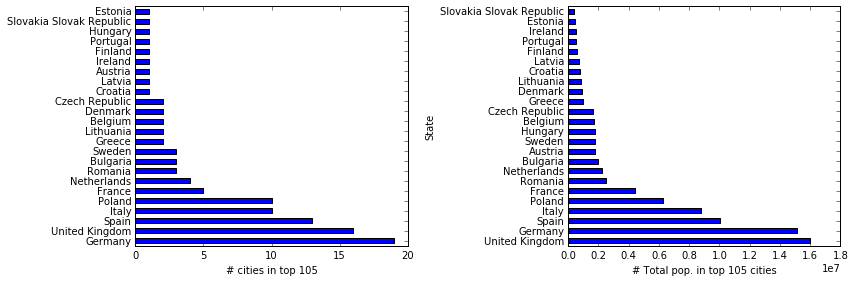

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

city_counts.plot(kind='barh',ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh',ax=ax2)
ax2.set_xlabel("# Total pop. in top 105 cities")

fig.tight_layout()
fig.savefig("ch12-state-city-counts-sum.pdf")

## 4.Time series

In [51]:
import datetime

In [55]:
pd.date_range("2015-1-1",periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range(datetime.datetime(2015,1,1),periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [59]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1",periods=31))

In [60]:
np.arange(31)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [61]:
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int64

In [62]:
ts1["2015-1-3"]

2

In [63]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', offset='D')

In [64]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [65]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [67]:
to_pydatetime?

Object `to_pydatetime` not found.


In [69]:
ts2 = pd.Series(np.random.rand(2),
               index=[datetime.datetime(2015,1,1),datetime.datetime(2015,2,1)])

In [70]:
ts2.head()

2015-01-01    0.803924
2015-02-01    0.947111
dtype: float64

In [80]:
periods = pd.PeriodIndex([pd.Period('2015-01'),pd.Period('2015-02'),pd.Period('2015-03')])

In [77]:
ts3 = pd.Series(np.random.rand(3),periods)

In [74]:
periods

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='int64', freq='M')

In [76]:
pd.Period

pandas._period.Period

In [78]:
ts3

2015-01    0.097343
2015-02    0.387073
2015-03    0.530135
Freq: M, dtype: float64

In [81]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='int64', freq='M')

In [82]:
ts2.to_period('M')

2015-01    0.803924
2015-02    0.947111
Freq: M, dtype: float64

In [83]:
ts2

2015-01-01    0.803924
2015-02-01    0.947111
dtype: float64

### Temperature time series example

In [84]:
!head -n 5 temperature_outdoor_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000


In [85]:
!wc -l temperature_outdoor_2014.tsv

49548 temperature_outdoor_2014.tsv


In [181]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv',delimiter='\t',names=["time","outdoor"])

In [182]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [183]:
df2 = pd.read_csv('temperature_indoor_2014.tsv',delimiter="\t",names=["time","indoor"])

In [184]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [185]:
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')

In [193]:
df1 = df1.set_index("time")

In [194]:
df2.time = (pd.to_datetime(df2.time.values,unit="s")
           .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [195]:
df2 = df2.set_index("time")

In [196]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [197]:
df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


In [198]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

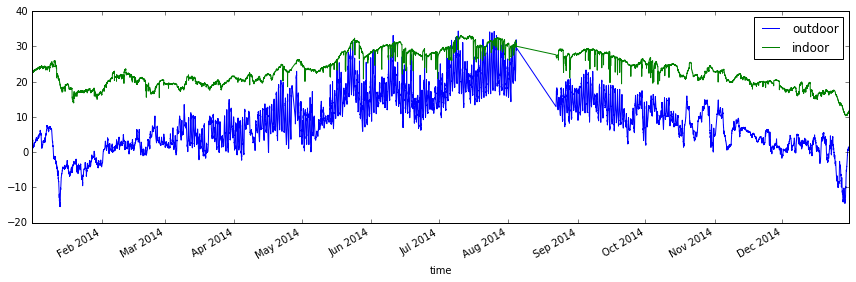

In [104]:
fig, ax = plt.subplots(1,1, figsize=(12,4))

df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()

In [105]:
# select january data

In [199]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


In [107]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [110]:
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [111]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
outdoor    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


In [112]:
df2_jan = df2["2014-1-1":"2014-1-31"]

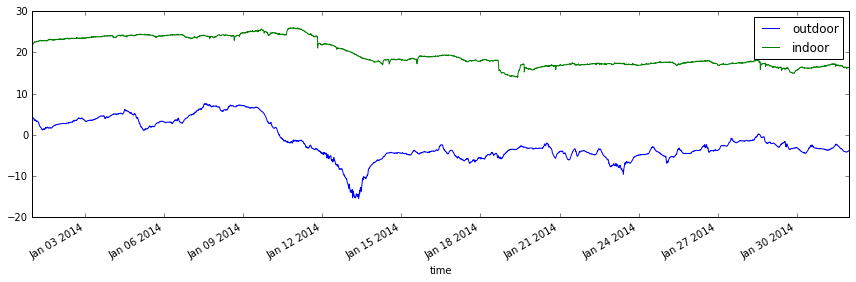

In [113]:
fig ,ax = plt.subplots(1,1,figsize=(12,4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()

In [114]:
# group by month

In [200]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]],axis=1)

In [154]:
df_month.head()

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160


In [173]:
df2.head()

,time,indoor
0,2014-01-01 00:03:06+01:00,21.94
1,2014-01-01 00:13:06+01:00,22.00
2,2014-01-01 00:23:07+01:00,22.00
3,2014-01-01 00:33:07+01:00,22.00
4,2014-01-01 00:43:08+01:00,22.00


In [1]:
df.to_period?

Object `df.to_period` not found.


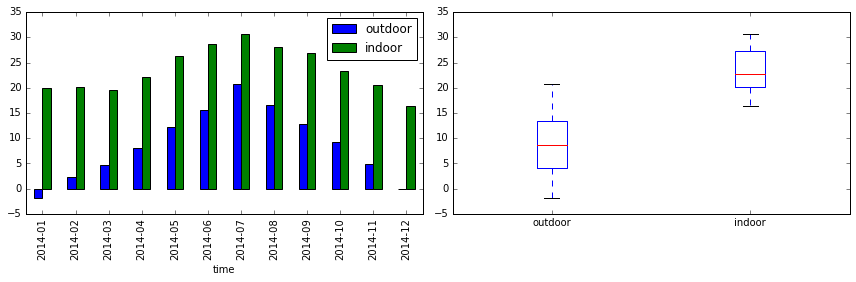

In [145]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()

In [146]:
df_month

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366
